In [ ]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = "C:/Users/Jana/Desktop/json_keys/api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target Account
target_user = "@NBCOlympics"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(10):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets 
    for tweet in public_tweets:

        #Print Tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


Tweet 1: 🇲🇽

#OpeningCeremony https://t.co/IHIWfITTyr
Tweet 2: The 🇳🇬 delegation features the first bobsled team from Africa in #WinterOlympics history. #OpeningCeremony https://t.co/nm98GYBABs
Tweet 3: The #OpeningCeremony Parade of Nations has begun!

First up: 🇬🇷 https://t.co/Vmn1TlsvzT
Tweet 4: Feel the beat of the drums. The #OpeningCeremony. Stunning. #WinterOlympics https://t.co/Ay5QOzAHZD https://t.co/q0aSGuos9W
Tweet 5: RT @DebbieA76781230: @NBCOlympics Olympic pride at work 🇺🇸#NBColympics #Number1Fan https://t.co/yKnq9l2P2J
Tweet 6: All eyes on 🇰🇷 in the #OpeningCeremony https://t.co/e7OwVez8UD
Tweet 7: Get an enhanced experience of the #WinterOlympics #OpeningCeremony RIGHT NOW: https://t.co/4xTYy2vsSf https://t.co/dpgQfO9MAD
Tweet 8: Magnificent. #OpeningCeremony https://t.co/TU0oLmhIYl
Tweet 9: I like turtles. 🐢 #WinterOlympics #OpeningCeremony https://t.co/kGJNo4jkL6
Tweet 10: Welcome. #WinterOlympics #OpeningCeremony https://t.co/GKDEEGQRLH
Tweet 11: "I feel so ecstatic!

Tweet 81: Name a more iconic duo. 🤩 https://t.co/4axpQ9pDwP
Tweet 82: .@RyanStassel is ready to hit the slopes in the #WinterOlympics!

Get to know him on today's Chasing Gold on… https://t.co/FqTTqtstjp
Tweet 83: Have a look at the top moments from 2018 Winter Olympics Opening Ceremony 👇 Watch the Opening Ceremony tonight at 8… https://t.co/1tDsAmVWap
Tweet 84: RT @JohnnyGWeir: When dreams come true. Thank you @terrygannon83 &amp; @taralipinski for being the best partners a guy could ask for. It’s my s…
Tweet 85: .@TeamUSA entering the #OpeningCeremony from @shaunwhite's point of view! #BestOfUS https://t.co/vdBWCMIVBp
Tweet 86: Good Friday morning!

We hope that your day is a PAWFECT TEN. 🐶 #WinterOlympics #BestOfUS https://t.co/pX21JiY552
Tweet 87: Get to know @TeamUSA short track speed skater @jrcelski in today's episode of Chasing Gold on @Snapchat.… https://t.co/aHYVfVhHzc
Tweet 88: TONIGHT'S THE NIGHT! 🎉 #OpeningCeremony https://t.co/xJKt9wQxNS
Tweet 89: RT @NBCOlympics: Tongan 

Tweet 161: RT @NBCOlympics: "That was, like, totally savage."

@MattJamilton and @heccabamilton won the first Olympic mixed doubles curling game in hi…
Tweet 162: RT @NBCChicagoFire: We'll be cheering on Team USA at the #WinterOlympics all February long! 🔥 See you March 1 for more #ChicagoFire. https:…
Tweet 163: RT @jonnymoseley: #goodluckmike @miketirico https://t.co/IJH0x6uHMK
Tweet 164: RT @Simone_Biles: Who’s excited for the #WinterOlympics to begin tonight on @NBCOlympics?!

Good Luck Nathan!!!! Can’t wait to watch you ki…
Tweet 165: RT @JohnnyGWeir: We’re live in one hour across ALL TIME ZONES for our coverage of the team figure skating men’s and pairs short programs. @…
Tweet 166: Guess what's back? Curling's back! Back again!

Click here to stream the #HamFam take on Switzerland:… https://t.co/fCmOxgVGjq
Tweet 167: We mustache you who @MattJamilton’s celebrity doppelgänger is 🤔 https://t.co/oI9wDeHyzR
Tweet 168: RT @liam_mchugh: About to go live with more #WinterOlympics cover

In [7]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sat Feb 10 02:03:57 +0000 2018,1.000,0.0,0.000,1
1,0.0000,Sat Feb 10 01:53:06 +0000 2018,1.000,0.0,0.000,2
2,0.0000,Sat Feb 10 01:51:26 +0000 2018,1.000,0.0,0.000,3
3,0.3818,Sat Feb 10 01:47:51 +0000 2018,0.809,0.0,0.191,4
4,0.3400,Sat Feb 10 01:44:29 +0000 2018,0.789,0.0,0.211,5


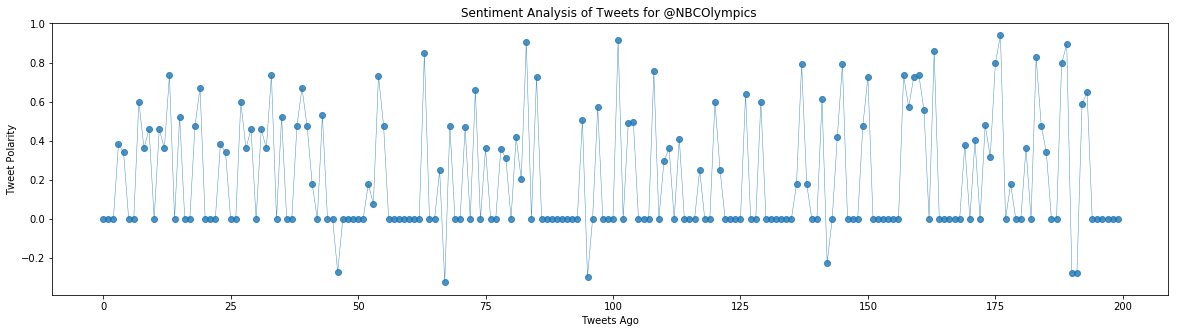

In [11]:
# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

from dateutil import parser
from pylab import rcParams
first_tweet = parser.parse(sentiments_pd["Date"][0])
rcParams['figure.figsize'] = 20, 5
# # Incorporate the other graph properties
plt.title(f"Sentiment Analysis of Tweets for {target_user} ")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("sentiment_analysis.png")
plt.show()